In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data

df = pd.read_csv('C:/Users/12367/Documents/Python Scripts/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Check for null Values

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
#Described Data

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
# Convert the year column to string
df['work_year'] = df['work_year'].astype(str)

# Change the year type from string to datetime
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

In [8]:
df.rename(columns={'work_year':'year'}, inplace=True)

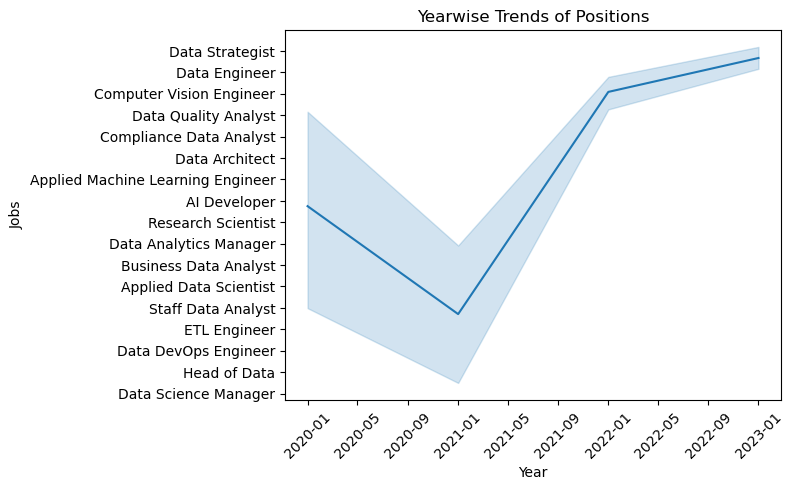

In [14]:
#Trend of count of positions through the years


g = sns.lineplot(x='year', y='job_title', data=df)
plt.title('Yearwise Trends of Positions')
plt.xticks(rotation=45)  # Rotate x-axis tick labels
plt.xlabel('Year')
plt.ylabel('Jobs')
plt.show()

Text(0, 0.5, 'Salary in USD$')

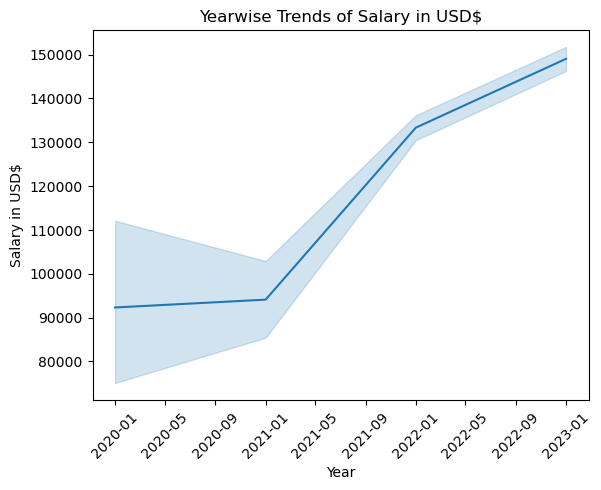

In [15]:
#Trend of Salaries through the years
h= sns.lineplot(x='year', y='salary_in_usd', data=df)
plt.xticks(rotation=45) 
plt.title('Yearwise Trends of Salary in USD$')
h.set_xlabel('Year')
h.set_ylabel('Salary in USD$')

[Text(0, 0, 'Data Analyst'),
 Text(1, 0, 'Data Scientist'),
 Text(2, 0, 'Machine Learning Engineer'),
 Text(3, 0, 'Data Engineer'),
 Text(4, 0, 'Analytics Engineer')]

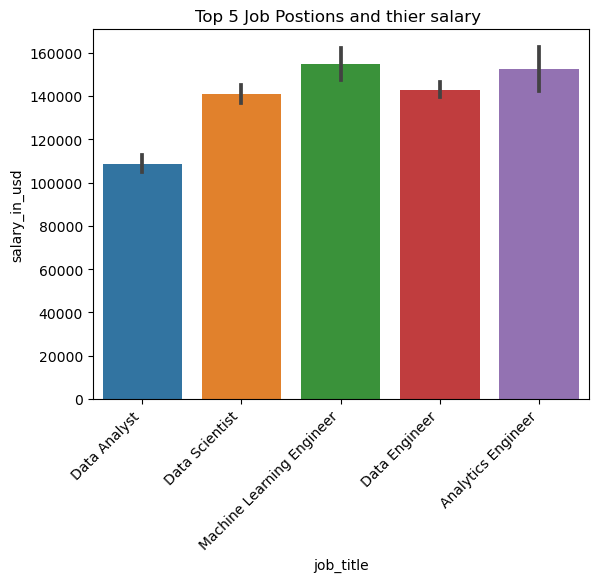

In [11]:
# Top 5 salaries earned by job titles
df_job = df[['job_title', 'salary_in_usd', 'year']].sort_values('salary_in_usd', ascending=False)
top_5_job_titles = df_job['job_title'].value_counts().head(5).index.tolist()
df_top_5_jobs = df_job[df_job['job_title'].isin(top_5_job_titles)]



# Plotting the histogram
sns.color_palette("husl")
f= sns.barplot(x='job_title', y='salary_in_usd', data=df_top_5_jobs)
plt.title('Top 5 Job Postions and thier salary ')
f.set_xticklabels(f.get_xticklabels(), rotation=45, ha='right')

Text(0.5, 1.0, 'Salary Vs Experience')

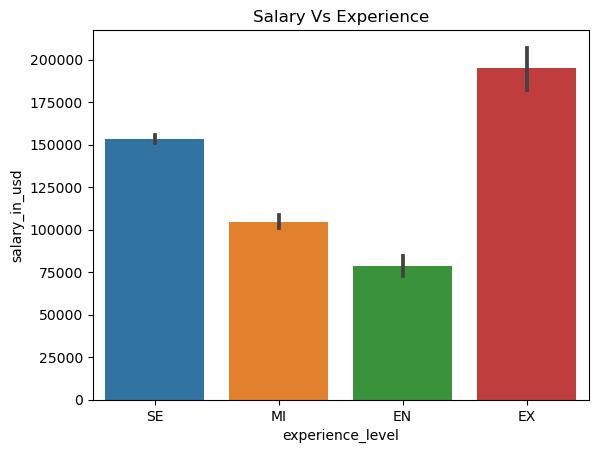

In [12]:
#Study the relation between the Salary earned and the experience Level
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Vs Experience')

Text(0.5, 1.0, 'Salary Vs Company Size')

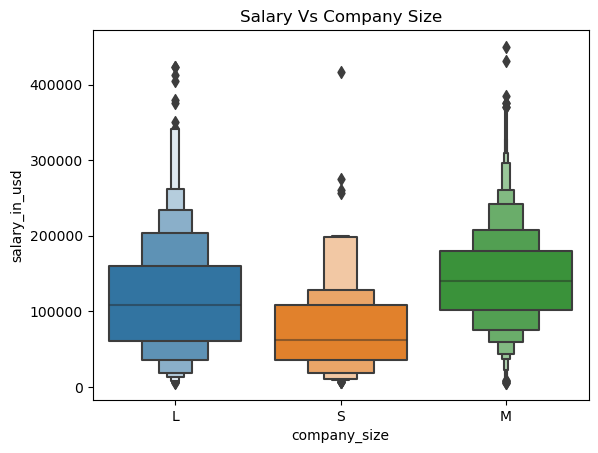

In [13]:
#Relation between the Salary earned and the company size
sns.boxenplot(x= 'company_size', y='salary_in_usd', data=df)
plt.title('Salary Vs Company Size')